In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

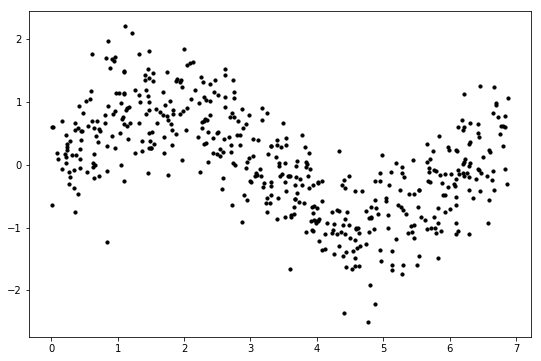

In [4]:
Datos = pd.read_csv("Graficas_Suavizamiento.csv")
x = list(Datos.X)
Y = list(Datos.Y)
n = len(x)
plt.figure(figsize=(9,6))
plt.scatter(x,Y,s=10,color='black')

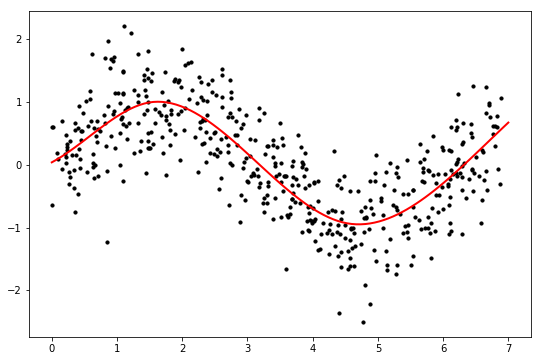

In [5]:
#Parámetros que podemos modificar
p = 3
Nudo = [1.5,4.5]
l = 0.01
#La estimación de los parámetros
K = len(Nudo)
X = np.array([[x[j]**i for i in range(p+1)]+[(max(0,x[j]-Nudo[k]))**p for k in range(K)] for j in range(n)])
D = np.diag([0 for i in range(p+1)] + [1 for i in range(K)])
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + (l**(2*p))*D),X.T),Y)
f = lambda x: sum([Beta[i]*x**i for i in range(p+1)]) + sum([Beta[p+1+i]*(max(0,x-Nudo[i]))**p for i in range(K)]) 
plt.figure(figsize=(9,6))
plt.scatter(x,Y,s=10,color='black')
plt.plot(np.linspace(0,7,100),[f(x) for x in np.linspace(0,7,100)],color='red',lw=2)